### Day 1: Sonar Sweep

In [69]:
input_file = 'data/input_day1.txt'
measurements = [int(l.strip()) for l in open(input_file).readlines()]
print(len(measurements))
increases = [measurements[i] > measurements[i-1] for i in range(1, len(measurements))]
print(len(increases), sum(increases))

2000
1999 1393


In [70]:
# Sanity check
for i in range(10):
    print(measurements[i], '\t', (increases[i-1] if i > 0 else ''))

156 	 
176 	 True
175 	 False
176 	 True
183 	 True
157 	 False
150 	 False
153 	 True
154 	 True
170 	 True


In [71]:
measurement_windows = (measurements[i:i+3] for i in range(len(measurements)-2))
measurement_sums = [sum(window) for window in measurement_windows]
print(len(measurement_sums), measurement_sums[:10])

1998 [507, 527, 534, 516, 490, 460, 457, 477, 486, 499]


In [72]:
increases = [measurement_sums[i] > measurement_sums[i-1] for i in range(1, len(measurement_sums))]
print(len(increases), sum(increases))

1997 1359


### Day 2: Dive!

In [73]:
input_file = 'data/input_day2.txt'
commands = [l.strip().split() for l in  open(input_file).readlines()]
hpos, depth = 0, 0
for command in commands:
    direction, X = command[0], int(command[1])
    if direction == 'up':
        depth -= X
    elif direction == 'down':
        depth += X
    elif direction == 'forward':
        hpos += X
hpos, depth, hpos * depth

(1968, 1063, 2091984)

In [74]:
hpos, depth, aim = 0, 0, 0
for command in commands:
    direction, X = command[0], int(command[1])
    if direction == 'up':
        aim -= X
    elif direction == 'down':
        aim += X
    elif direction == 'forward':
        hpos += X
        depth += aim * X
hpos, depth, hpos * depth

(1968, 1060092, 2086261056)

### Day 3: Binary Diagnostic

In [75]:
input_file = 'data/input_day3.txt'
binary_nums = [list(map(int, l.strip())) for l in open(input_file).readlines()]
len(binary_nums), binary_nums[0]

(1000, [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [76]:
import numpy as np
bit_sums = np.sum(binary_nums, axis=0)
bit_sums

array([511, 497, 496, 506, 504, 519, 487, 488, 499, 520, 503, 499])

In [87]:
most_common_mask = (bit_sums > len(binary_nums) / 2)
gamma = list(map(int, most_common_mask))
epsilon = list(map(int, ~most_common_mask))

def bitlist_to_num(l):
    return int(''.join(map(str, l)), 2)

gamma, epsilon, bitlist_to_num(gamma), bitlist_to_num(epsilon), bitlist_to_num(gamma) * bitlist_to_num(epsilon)

([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1],
 2502,
 1593,
 3985686)

In [124]:
def most_common_bit(binary_numbers, pos=0):
    """Returns most common bit at a given position, or 1 if 0 and 1 are present the same number of times."""
    return int(np.mean([num[pos] for num in binary_numbers]) >= 0.5)
    
bin_nums = [
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 1],
    [0, 1, 0]
]
assert most_common_bit(bin_nums, 0) == 0
assert most_common_bit(bin_nums, 1) == most_common_bit(bin_nums, 2) == 1

In [117]:
def filter_by_criteria(binary_numbers, criteria='most common', pos=0):
    if len(binary_numbers) == 1:
        return int(''.join(map(str, binary_numbers[0])), 2)
    
    bit_filter = most_common_bit(binary_numbers, pos)
    if criteria != 'most common':
        bit_filter = abs(bit_filter - 1)
        
    filtered_numbers = filter(lambda num: num[pos] == bit_filter, binary_numbers)
    return filter_by_criteria(list(filtered_numbers), criteria, pos+1)

In [128]:
# Check provided example
sample = """
00100
11110
10110
10111
10101
01111
00111
11100
10000
11001
00010
01010
""".strip()
sample = [list(map(int, s)) for s in sample.split('\n') if s]
assert filter_by_criteria(sample) == 23  # oxygen generator rating
assert filter_by_criteria(sample, criteria='least common') == 10  # CO2 scrubber rating

In [130]:
filter_by_criteria(binary_nums) * filter_by_criteria(binary_nums, criteria='least common')

2555739

### Day 4: Giant Squid

In [2]:
sample = """
7,4,9,5,11,17,23,2,0,14,21,24,10,16,13,6,15,25,12,22,18,20,8,19,3,26,1

22 13 17 11  0
 8  2 23  4 24
21  9 14 16  7
 6 10  3 18  5
 1 12 20 15 19

 3 15  0  2 22
 9 18 13 17  5
19  8  7 25 23
20 11 10 24  4
14 21 16 12  6

14 21 17 24  4
10 16 15  9 19
18  8 23 26 20
22 11 13  6  5
 2  0 12  3  7
""".strip().split('\n')

In [3]:
def parse_bingo_input(lines):
    drawn_numbers = list(map(int, lines[0].split(',')))
    boards, board = [], []
    for l in lines[2:]:
        if l.strip():
            board.append(list(map(int, l.strip().split())))
            if len(board) == 5:
                boards.append(board)
                board = []
    return drawn_numbers, boards

n, b = parse_bingo_input(sample)
len(n), len(b), b[0]

(27,
 3,
 [[22, 13, 17, 11, 0],
  [8, 2, 23, 4, 24],
  [21, 9, 14, 16, 7],
  [6, 10, 3, 18, 5],
  [1, 12, 20, 15, 19]])

In [243]:
class BingoBoard(object):
    def __init__(self, values):
        assert len(values) == 5, values
        assert all(len(v) == 5 for v in values), values
        
        self.values = np.array(values, dtype=int)
        self.drawn = np.zeros((5, 5), dtype=bool)
        self.score = 0
        self.won = False

    def __repr__(self):
        return '\n'.join(
            '\t'.join(
                f'{"*" if self.drawn[i,j] else " "}{val}' 
                for j, val in enumerate(row)
            )
            for i, row in enumerate(self.values)
        )
    
    def draw_number(self, *ns):
        for n in ns:
            self.drawn[self.values==n] = True
            self.won = self._has_won()
            if self.won:
                self.score = n * self.values[~self.drawn].sum()
        
    def _has_won(self):
        return bool(self.drawn.prod(axis=0).sum()) or bool(self.drawn.prod(axis=1).sum())
    
bb = BingoBoard(parse_bingo_input(sample)[1][2])
bb.draw_number(7, 4, 9, 5, 11, 17, 23, 2, 0, 14, 21, 24)
assert bb.won and bb.score == 4512
bb

*14	*21	*17	*24	*4
 10	 16	 15	*9	 19
 18	 8	*23	 26	 20
 22	*11	 13	 6	*5
*2	*0	 12	 3	*7

In [272]:
drawn_numbers, board_values = parse_bingo_input(open('data/input_day4.txt').readlines())
print(len(drawn_numbers), len(board_values))
board_values[0]

100 100


[[31, 23, 52, 26, 8],
 [27, 89, 37, 80, 46],
 [97, 19, 63, 34, 79],
 [13, 59, 45, 12, 73],
 [42, 25, 22, 6, 39]]

In [273]:
# Part 1: Pick the first winning board
done = False
boards = [BingoBoard(b) for b in board_values]
for n in drawn_numbers:
    print(n, end='.. ')
    for b in boards:
        b.draw_number(n)
        if b.won:
            print(b.score)
            print(b)
            done = True
            break
    if done:
        break

27.. 14.. 70.. 7.. 85.. 66.. 65.. 57.. 68.. 23.. 33.. 78.. 4.. 84.. 25.. 18.. 43.. 71.. 76.. 61.. 34.. 82.. 93.. 74.. 64084
*7	*70	 5	 69	*4
*34	 60	 40	 73	 6
*74	 54	 67	 32	 38
*93	 62	 17	 51	 86
*57	 88	 99	 3	 16


In [274]:
# Part 2: Pick the last winning board
boards = [BingoBoard(b) for b in board_values]
boards_done = []
for n in drawn_numbers:
    print(n, end='.. ')
    for i, b in enumerate(boards):
        if i in boards_done:
            continue
            
        b.draw_number(n)
        if b.won:
            # print(f'Board {i} won!')
            boards_done.append(i)
            if len(boards) == len(boards_done):  # All done
                print(b.score)
                print(b)
            
    if len(boards) == len(boards_done):
        break

27.. 14.. 70.. 7.. 85.. 66.. 65.. 57.. 68.. 23.. 33.. 78.. 4.. 84.. 25.. 18.. 43.. 71.. 76.. 61.. 34.. 82.. 93.. 74.. 26.. 15.. 83.. 64.. 2.. 35.. 19.. 97.. 32.. 47.. 6.. 51.. 99.. 20.. 77.. 75.. 56.. 73.. 80.. 86.. 55.. 36.. 13.. 95.. 52.. 63.. 79.. 72.. 9.. 10.. 16.. 8.. 69.. 11.. 50.. 54.. 81.. 22.. 45.. 1.. 12.. 88.. 44.. 17.. 62.. 0.. 96.. 94.. 31.. 90.. 39.. 92.. 37.. 40.. 5.. 98.. 24.. 38.. 46.. 21.. 30.. 49.. 41.. 12833
*52	*31	*24	*68	*41
 48	*82	*19	 29	*65
*51	 91	*97	*39	*80
 3	*55	*43	*40	*38
*20	 89	 53	*45	*75


### Day 5: Hydrothermal Venture

In [18]:
sample = """
0,9 -> 5,9
8,0 -> 0,8
9,4 -> 3,4
2,2 -> 2,1
7,0 -> 7,4
6,4 -> 2,0
0,9 -> 2,9
3,4 -> 1,4
0,0 -> 8,8
5,5 -> 8,2
""".strip().split('\n')

In [50]:
def parse_input(lines):
    return [tuple(map(lambda s: tuple(map(int, s.split(','))), l.split(' -> ')))
             for l in lines]
parse_input(sample)[:2]

[((0, 9), (5, 9)), ((8, 0), (0, 8))]

In [65]:
from collections import defaultdict

def count_intersections(vent_lines, include_diagonals=False):
    vent_points = defaultdict(int)
    for vent_line in vent_lines:
        (x1, y1), (x2, y2) = vent_line
        x_step = 1 if x1 <= x2 else -1
        y_step = 1 if y1 <= y2 else -1
        
        if x1 == x2:  # Horizontal
            for y in range(y1, y2+y_step, y_step):
                vent_points[f'{x1},{y}'] += 1
        elif y1 == y2:  # Vertical
            for x in range(x1, x2+x_step, x_step):
                vent_points[f'{x},{y1}'] += 1
        elif include_diagonals:  # Diagonal
            for x, y in zip(range(x1, x2+x_step, x_step), range(y1, y2+y_step, y_step)):
                vent_points[f'{x},{y}'] += 1
                
    return sum(k > 1 for k in vent_points.values())

assert count_intersections(parse_input(sample)) == 5
assert count_intersections(parse_input(sample), include_diagonals=True) == 12

In [66]:
vent_lines = parse_input(open('data/input_day5.txt').readlines())
len(vent_lines), vent_lines[0], vent_lines[-1]

(500, ((452, 244), (452, 303)), ((858, 704), (858, 272)))

In [68]:
count_intersections(vent_lines), count_intersections(vent_lines, include_diagonals=True)

(5774, 18423)

### Day 6: Lanternfish

In [62]:
sample = list(map(int, '3,4,3,1,2'.split(',')))
sample

[3, 4, 3, 1, 2]

In [63]:
def simulate_lanternfish_growth(initial_state, days):
    current_pop = initial_state[:]
    for _ in range(days):
        for i in range(len(current_pop)):
            if current_pop[i] == 0:
                current_pop.append(8)
                current_pop[i] = 6
            else:
                current_pop[i] -= 1
    return len(current_pop)

assert simulate_lanternfish_growth(sample, 18) == 26
# assert simulate_lanternfish_growth(sample, 256) == 26984457539

In [64]:
initial_state = list(map(int, open('data/input_day6.txt').read().strip().split(',')))
len(initial_state), initial_state[0], initial_state[-1]

(300, 2, 1)

In [65]:
simulate_lanternfish_growth(initial_state, 80)

352151

In [68]:
import numpy as np
from collections import Counter, defaultdict

def simulate_lanternfish_growth_faster(initial_state, days):
    current_pop = defaultdict(int, Counter(initial_state))
    for _ in range(days):
        current_pop = {counter: (current_pop[counter+1] + current_pop[0] if counter == 6 else
                                 current_pop[0] if counter == 8 else
                                 current_pop[counter+1])
                       for counter in range(9)}
        
    return sum(current_pop.values())
    
assert simulate_lanternfish_growth_faster(sample, 18) == 26
assert simulate_lanternfish_growth_faster(sample, 256) == 26984457539

In [75]:
%timeit simulate_lanternfish_growth(sample, 30)
%timeit simulate_lanternfish_growth(sample, 100)
%timeit simulate_lanternfish_growth_faster(sample, 30)
%timeit simulate_lanternfish_growth_faster(sample, 100)

76.2 µs ± 762 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
39 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
43.4 µs ± 68.2 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
138 µs ± 296 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [77]:
simulate_lanternfish_growth_faster(initial_state, 256)

1601616884019

### Day 7: The Treachery of Whales

In [4]:
sample = list(map(int, "16,1,2,0,4,2,7,1,2,14".split(',')))
sample

[16, 1, 2, 0, 4, 2, 7, 1, 2, 14]

In [21]:
# Part 1
import numpy as np
np.median(sample)

2.0

In [26]:
def calc_fuel(nums, point):
    return sum(abs(num - point) for num in nums)

assert calc_fuel(sample, 2) == 37

In [32]:
crab_positions = list(map(int, open('data/input_day7.txt').read().strip().split(',')))
print(len(crab_positions), crab_positions[0], crab_positions[-1])
calc_fuel(crab_positions, np.median(crab_positions))

1000 1101 398


347509.0

In [37]:
# Part 2
np.average(sample)

4.9

In [38]:
def calc_fuel_increasing(nums, point):
    return sum(abs(num - point) * (abs(num - point) + 1) / 2 for num in nums)

assert calc_fuel_increasing(sample, 5) == 168
assert calc_fuel_increasing(sample, 2) == 206

In [39]:
scores = [(i, calc_fuel_increasing(sample, i)) for i in range(max(sample))]
min(scores, key=lambda p: p[1])

(5, 168.0)

In [40]:
np.average(crab_positions)

473.523

In [47]:
scores = [(i, calc_fuel_increasing(crab_positions, i)) for i in range(473, 493)]
min(scores, key=lambda p: p[1])

(473, 98257206.0)

### Day 8: Seven Segment Search

In [17]:
sample = """
be cfbegad cbdgef fgaecd cgeb fdcge agebfd fecdb fabcd edb |
fdgacbe cefdb cefbgd gcbe
edbfga begcd cbg gc gcadebf fbgde acbgfd abcde gfcbed gfec |
fcgedb cgb dgebacf gc
fgaebd cg bdaec gdafb agbcfd gdcbef bgcad gfac gcb cdgabef |
cg cg fdcagb cbg
fbegcd cbd adcefb dageb afcb bc aefdc ecdab fgdeca fcdbega |
efabcd cedba gadfec cb
aecbfdg fbg gf bafeg dbefa fcge gcbea fcaegb dgceab fcbdga |
gecf egdcabf bgf bfgea
fgeab ca afcebg bdacfeg cfaedg gcfdb baec bfadeg bafgc acf |
gebdcfa ecba ca fadegcb
dbcfg fgd bdegcaf fgec aegbdf ecdfab fbedc dacgb gdcebf gf |
cefg dcbef fcge gbcadfe
bdfegc cbegaf gecbf dfcage bdacg ed bedf ced adcbefg gebcd |
ed bcgafe cdgba cbgef
egadfb cdbfeg cegd fecab cgb gbdefca cg fgcdab egfdb bfceg |
gbdfcae bgc cg cgb
gcafb gcf dcaebfg ecagb gf abcdeg gaef cafbge fdbac fegbdc |
fgae cfgab fg bagce
""".strip().replace('|\n', '| ').split('\n')
sample = list(map(lambda l: list(map(str.split, l.split(' | '))), sample))
len(sample), sample[0]

(10,
 [['be',
   'cfbegad',
   'cbdgef',
   'fgaecd',
   'cgeb',
   'fdcge',
   'agebfd',
   'fecdb',
   'fabcd',
   'edb'],
  ['fdgacbe', 'cefdb', 'cefbgd', 'gcbe']])

In [19]:
digit_segments = {
    0: 'abcefg',
    1: 'cf',
    2: 'acdeg',
    3: 'acdfg',
    4: 'bcdf',
    5: 'abdfg',
    6: 'abdefg',
    7: 'acf',
    8: 'abcdefg',
    9: 'abcdfg'
}
segments_per_digits = {d: len(s) for d, s in digit_segments.items()}
easy_digits = {d: n for d, n in segments_per_digits.items() if list(segments_per_digits.values()).count(n) == 1}
easy_digits

{1: 2, 4: 4, 7: 3, 8: 7}

In [21]:
def count_easy_digits(signal_entries):
    return sum(len(v) in easy_digits.values() 
               for _, output_values in signal_entries
               for v in output_values)

assert count_easy_digits(sample) == 26

In [22]:
signal_entries = list(map(lambda l: list(map(str.split, l.split(' | '))), 
                          open('data/input_day8.txt').readlines()))
len(signal_entries), signal_entries[0]

(200,
 [['dcbgefa',
   'cebd',
   'bfega',
   'eadbf',
   'db',
   'cdfaeb',
   'dba',
   'bfcgda',
   'egadcf',
   'aedcf'],
  ['egadcfb', 'eafcd', 'db', 'debc']])

In [23]:
count_easy_digits(signal_entries)

261

In [155]:
def decode_pattern(decoder, pattern):
    return ''.join(sorted(decoder[c] for c in pattern))

def find_wire_connection(digit_patterns):
    for i, perm in enumerate(permutations('abcdefg', 7)):
        decoder = {after: before for before, after in zip('abcdefg', perm)}
        is_valid = True

        digits_left = list(digit_segments.values())
        for pattern in digit_patterns:
            decoded_pattern = decode_pattern(decoder, pattern)
            if decoded_pattern in digits_left:
                digits_left.remove(decoded_pattern)
            else:
                is_valid = False
                break

        if is_valid:
            return decoder
            
find_wire_connection(entry)

{'a': 'a', 'c': 'b', 'b': 'c', 'e': 'd', 'g': 'e', 'd': 'f', 'f': 'g'}

In [160]:
segments_to_digit = {v: k for k, v in digit_segments.items()}

def decode_output(decoder, output_patterns):
    return int(''.join(str(segments_to_digit[decode(decoder, pat)]) for pat in output_patterns))

def calc_outputs_sum(entries):
    sum_output_values = 0
    for digit_patterns, output_patterns in entries:
        decoder = find_wire_connection(digit_patterns)
        output_value = decode_output(decoder, output_patterns)
        sum_output_values += output_value
    
    return sum_output_values

assert calc_outputs_sum(sample) == 61229

In [161]:
calc_outputs_sum(signal_entries)

987553

### Day 9: Smoke Basin

In [1]:
sample = """
2199943210
3987894921
9856789892
8767896789
9899965678
""".strip().split('\n')

def parse_heightmap(txt):
    return list(map(lambda s: [int(c) for c in s.strip()], txt))

sample = parse_heightmap(sample)
len(sample), len(sample[0])

(5, 10)

In [2]:
# Part 1

def get_low_points(heightmap):
    return ((i,j)
            for i, row in enumerate(heightmap)
            for j, height in enumerate(row)
            if not (
                i-1 >= 0 and heightmap[i-1][j] <= height  # above
                or j-1 >= 0 and heightmap[i][j-1] <= height  # left
                or j+1 < len(row)  and heightmap[i][j+1] <= height  # right
                or i+1 < len(heightmap) and heightmap[i+1][j] <= height # below
            ))

def calc_risk_level(heightmap):
    return sum(heightmap[i][j] + 1 for i, j in get_low_points(heightmap))

assert calc_risk_level(sample) == 15

In [3]:
heightmap = parse_heightmap(open('data/input_day9.txt').readlines())
len(heightmap), len(heightmap[0])

(100, 100)

In [4]:
calc_risk_level(heightmap)

480

In [6]:
# Part 2

def get_adjacent_points(point, heightmap):
    i, j = point
    ps = []
    if i-1 >= 0:
        ps.append((i-1, j))
    if j-1 >= 0:
        ps.append((i, j-1))
    if j+1 < len(heightmap[i]):
        ps.append((i, j+1))
    if i+1 < len(heightmap):
        ps.append((i+1, j))
    return ps

def grow_point_basin(point, heightmap, basin_points=None):
    i, j = point
    if heightmap[i][j] == 9:
        return []
    
    if basin_points is None:
        basin_points = []
    basin_points.append(point)
    
    for neighbour in get_adjacent_points(point, heightmap):
        if neighbour not in basin_points:
            grow_point_basin(neighbour, heightmap, basin_points)
    
    return basin_points


assert [len(grow_point_basin(lp, sample)) for lp in get_low_points(sample)] == [3, 9, 14, 9]

In [7]:
from functools import reduce

def calc_product_biggest_basins(heightmap):
    return reduce(lambda x, y: x * y,
                  sorted((len(grow_point_basin(lp, heightmap)) for lp in get_low_points(heightmap)))[-3:])

assert calc_product_biggest_basins(sample) == 1134

In [8]:
calc_product_biggest_basins(heightmap)

1045660

### Day 10: Syntax Scoring

In [4]:
sample = """
[({(<(())[]>[[{[]{<()<>>
[(()[<>])]({[<{<<[]>>(
{([(<{}[<>[]}>{[]{[(<()>
(((({<>}<{<{<>}{[]{[]{}
[[<[([]))<([[{}[[()]]]
[{[{({}]{}}([{[{{{}}([]
{<[[]]>}<{[{[{[]{()[[[]
[<(<(<(<{}))><([]([]()
<{([([[(<>()){}]>(<<{{
<{([{{}}[<[[[<>{}]]]>[]]""".strip().split('\n')
len(sample), sample[0]

(10, '[({(<(())[]>[[{[]{<()<>>')

In [10]:
import re

def remove_valid_chunks(s):
    return s.replace('[]', '').replace('<>', '').replace('{}', '').replace('()', '')

closing_chars = '})]>'
opening_chars = '{([<'

def first_closing(s):
    return next(filter(lambda c: c in closing_chars, s), None)

def first_illegal_char(line):
    while line:
        new_line = remove_valid_chunks(line)
        if new_line == line:
            break
        line = new_line
    return first_closing(new_line)

assert first_illegal_char('{([(<{}[<>[]}>{[]{[(<()>') == '}'
assert first_illegal_char('[[<[([]))<([[{}[[()]]]') == ')'
assert first_illegal_char('[{[{({}]{}}([{[{{{}}([]') == ']'
assert first_illegal_char('[<(<(<(<{}))><([]([]()') == ')'
assert first_illegal_char('<{([([[(<>()){}]>(<<{{') == '>'

In [30]:
error_char_scores = {')': 3, ']': 57, '}': 1197, '>': 25137}

def syntax_error_score(lines):
    return sum(error_char_scores.get(first_illegal_char(l), 0) for l in lines)

assert syntax_error_score(sample) == 26397

In [28]:
navigation_subsystem = list(map(str.strip, open('data/input_day10.txt').readlines()))
len(navigation_subsystem), syntax_error_score(navigation_subsystem)

(102, 366027)

In [29]:
# Part 2

open_to_closing_char = {o: c for o, c in zip(opening_chars, closing_chars)}

def complete_line(l):
    opening_chars_found = []
    for c in l:
        if c in opening_chars:
            opening_chars_found.append(c)
        elif open_to_closing_char[opening_chars_found[-1]] == c:
            opening_chars_found.pop()
    
    return ''.join(open_to_closing_char[c] for c in opening_chars_found[::-1])

assert complete_line('[({(<(())[]>[[{[]{<()<>>') == '}}]])})]'
assert complete_line('[(()[<>])]({[<{<<[]>>(') == ')}>]})'
assert complete_line('(((({<>}<{<{<>}{[]{[]{}') == '}}>}>))))'
assert complete_line('{<[[]]>}<{[{[{[]{()[[[]') == ']]}}]}]}>'
assert complete_line('<{([{{}}[<[[[<>{}]]]>[]]') == '])}>'

In [32]:
completion_char_scores = {')': 1, ']': 2, '}': 3, '>': 4}

def score_completion_string(l):
    score = 0
    for c in l:
        score *= 5
        score += completion_char_scores[c]
    return score

assert score_completion_string('}}]])})]') == 288957
assert score_completion_string(')}>]})') == 5566
assert score_completion_string('}}>}>))))') == 1480781
assert score_completion_string(']]}}]}]}>') == 995444
assert score_completion_string('])}>') == 294

In [34]:
def autocomplete_winner(lines):
    completion_scores = [score_completion_string(complete_line(l))
                         for l in lines
                         if first_illegal_char(l) is None]
    return sorted(completion_scores)[len(completion_scores)//2]

assert autocomplete_winner(sample) == 288957

In [35]:
autocomplete_winner(navigation_subsystem)

1118645287

### Day 11: Dumbo Octopus

In [66]:
sample = """
5483143223
2745854711
5264556173
6141336146
6357385478
4167524645
2176841721
6882881134
4846848554
5283751526
""".strip().split('\n')
sample = [list(map(int, l)) for l in sample]
len(sample), len(sample[0]), sample[0]

(10, 10, [5, 4, 8, 3, 1, 4, 3, 2, 2, 3])

In [59]:
# !pip install networkx matplotlib

In [63]:
import networkx as nx

def create_graph(source_data):
    G = nx.grid_2d_graph(len(source_data), len(source_data[0]))
    for i,j in G.nodes:
        G.nodes[(i,j)]['energy'] = source_data[i][j]
    G.add_edges_from([
        e
        for x in range(len(source_data)-1)
        for y in range(len(source_data[0])-1)
        for e in [((x, y), (x+1, y+1)), ((x+1, y), (x, y+1))]
    ])
    return G

def draw_graph(G, source_data):
    pos = dict(((i, j), (j, len(source_data)-i-1)) for i,j in G.nodes())  # A dictionary with nodes as keys and positions as values
    labels = dict((n, e) for n, e in G.nodes(data='energy'))
    nx.draw(G, pos=pos, labels=labels)

def get_flashing(octopus_graph, exclude=[]):
    # print('exclude', exclude)
    flashing = [n for n, d in octopus_graph.nodes(data=True) if d['energy'] > 9]
    # print(flashing)
    flashing = [n for n in flashing if n not in exclude]
    return flashing
    
def step(octopus_graph):
    # Each octopus' energy level increases by 1
    for i,j in octopus_graph.nodes:
        octopus_graph.nodes[(i,j)]['energy'] += 1
        
    # Each octopus above 9 flashes and its neighbours increase by 1 until done propagating
    all_flashers = []
    while True:
        new_flashers = get_flashing(octopus_graph, exclude=all_flashers)
        if not new_flashers:
            break
            
        for flasher in new_flashers:
            for flash_neighbour in octopus_graph.neighbors(flasher):
                octopus_graph.nodes[flash_neighbour]['energy'] += 1
        all_flashers += new_flashers
            
    # Increment counter and reset all flashers
    for flasher in all_flashers:
        octopus_graph.nodes[flasher]['energy'] = 0
        
    return octopus_graph, len(all_flashers)

In [74]:
def simulate_octopus_energies(source_data, n_steps):
    G = create_graph(source_data)
    # draw_graph(G, source_data)
    total_flashers = 0
    for i in range(n_steps):
        G, num_flashers = step(G)
        total_flashers += num_flashers
        # print(f'Step {i+1}: {num_flashers} octopies flashed!')
    return total_flashers

assert simulate_octopus_energies(sample, 10) == 204
assert simulate_octopus_energies(sample, 100) == 1656

In [75]:
start_levels = [list(map(int, l.strip())) for l in open('data/input_day11.txt').readlines()]
len(start_levels), len(start_levels[0]), start_levels[0]

(10, 10, [6, 7, 4, 4, 6, 3, 8, 4, 5, 5])

In [76]:
simulate_octopus_energies(start_levels, 100)

1608

In [81]:
def first_octopus_sync(source_data, max_steps=200):
    G = create_graph(source_data)
    for i in range(max_steps):
        G, num_flashers = step(G)
        if num_flashers == len(G.nodes):
            return i+1
        
assert first_octopus_sync(sample) == 195

In [82]:
first_octopus_sync(start_levels, max_steps=500)

214

### Day 12: Passage Pathing

In [149]:
sample1 = """
start-A
start-b
A-c
A-b
b-d
A-end
b-end""".strip().split('\n')
sample1

['start-A', 'start-b', 'A-c', 'A-b', 'b-d', 'A-end', 'b-end']

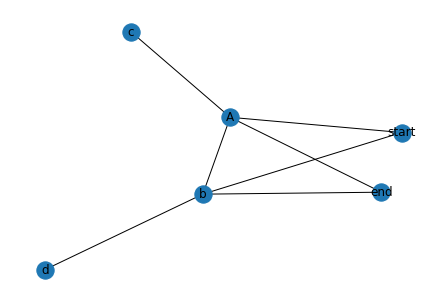

In [151]:
def graph_from_lines(lines):
    G = nx.Graph()
    G.add_edges_from([tuple(l.strip().split('-')) for l in lines])
    return G

G = graph_from_lines(sample1)
nx.draw(G, labels=dict(zip(G.nodes, G.nodes)))

In [188]:
from collections import defaultdict

def is_small_cave(node):
    return node.islower()

def expand_path(current_node, graph, small_cave_stops=None):
    updated_small_cave_stops = small_cave_stops and small_cave_stops[:] or []
        
    # End conditions 
    if current_node == 'end':
        return [current_node]
    if is_small_cave(current_node):
        if current_node in updated_small_cave_stops:
            return []
        updated_small_cave_stops.append(current_node)
    
    # Recursion
    return [f'{current_node},{np}' 
            for neighbour in filter(lambda n: n != 'start', graph.neighbors(current_node))
            for np in expand_path(neighbour, graph, updated_small_cave_stops)]

def count_paths(graph, current_node='start', small_cave_stops=None, allow_double_stop=False):
    updated_small_cave_stops = small_cave_stops and small_cave_stops.copy() or defaultdict(int)
        
    # End conditions
    if current_node == 'end':
        return 1
    if is_small_cave(current_node):
        
        if (updated_small_cave_stops[current_node] >= 1
            and (not allow_double_stop or 2 in updated_small_cave_stops.values())):
            return 0
            
        updated_small_cave_stops[current_node] += 1
    
    # Recursion
    return sum(count_paths(graph, neighbour, updated_small_cave_stops, allow_double_stop=allow_double_stop)
               for neighbour in filter(lambda n: n != 'start', graph.neighbors(current_node)))
            
assert (is_small_cave('start'), is_small_cave('c'), is_small_cave('A')) == (True, True, False)
display(expand_path('start', G))
assert count_paths(G) == 10
assert count_paths(G, allow_double_stop=True) == 36

['start,A,c,A,b,A,end',
 'start,A,c,A,b,end',
 'start,A,c,A,end',
 'start,A,b,A,c,A,end',
 'start,A,b,A,end',
 'start,A,b,end',
 'start,A,end',
 'start,b,A,c,A,end',
 'start,b,A,end',
 'start,b,end']

In [191]:
sample2 = """
dc-end
HN-start
start-kj
dc-start
dc-HN
LN-dc
HN-end
kj-sa
kj-HN
kj-dc""".strip().split('\n')
sample3 = """
fs-end
he-DX
fs-he
start-DX
pj-DX
end-zg
zg-sl
zg-pj
pj-he
RW-he
fs-DX
pj-RW
zg-RW
start-pj
he-WI
zg-he
pj-fs
start-RW""".strip().split('\n')
assert count_paths(graph_from_lines(sample2)) == 19
assert count_paths(graph_from_lines(sample2), allow_double_stop=True) == 103
assert count_paths(graph_from_lines(sample3)) == 226
assert count_paths(graph_from_lines(sample3), allow_double_stop=True) == 3509

In [193]:
cave_system = graph_from_lines(open('data/input_day12.txt').readlines())
count_paths(cave_system), count_paths(cave_system, allow_double_stop=True)

(3802, 99448)